<a href="https://colab.research.google.com/github/Reis25/CienciaDosDados/blob/master/Lista1_AM_DemetriosReis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning, List 1.

Demetrios Reis Costa

In [ ]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats

# carregando os dados
df = pd.read_csv('USArrests.csv') 

In [ ]:
# Estilo dos dados
plt.style.use('ggplot')

os.getcwd()

Calculate the:

* mean;
* median;
* obliquity;
* and kurtosis

 for the mpg from the USAArrests data.

In [ ]:
# Show head dataframe:
df.head()

# exibindo planilha
#print(df)

In [ ]:
# media das colunas (inclusive murder)
df.mean(axis = 0)

In [ ]:
# mediana das colunas (inclusive murder)
df.median(axis= 0)
df[df['Murder'] > 10]

In [ ]:
# obliquidade das colunas (inclusive Murder)
print(df.skew())

Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64


In [ ]:
# Curtose das colunas (inclusive murder)
df.kurtosis(axis = 0)

Murder     -0.827488
Assault    -1.053848
UrbanPop   -0.738360
Rape        0.353964
dtype: float64

(2) Calcule a matriz de covariância e de correlação para o dado USArrests.


a) Matriz de Covariancia:

In [ ]:
df.cov()

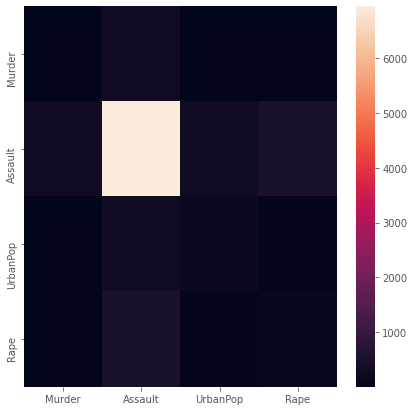

In [ ]:
# Mapa de calor em relativa à correlçao entre as variáveis. 

plt.figure(figsize=(7,7))

sns.heatmap(df.cov())

b) Matriz de Correlação:

In [ ]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


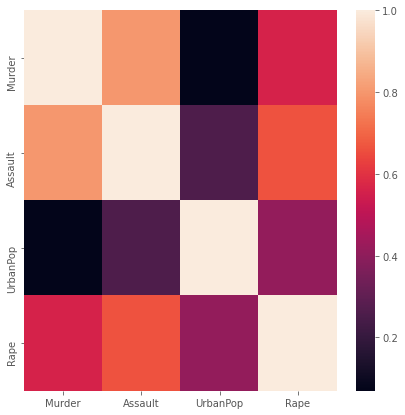

In [ ]:
# Mapa de calor em relativa à correlçao entre as variáveis. 
plt.figure(figsize=(7,7))

sns.heatmap(df.corr())

(3) Faz um scatter plot e verifique os atributos que têm correlações maior que 0.5 e menor que -0.5.


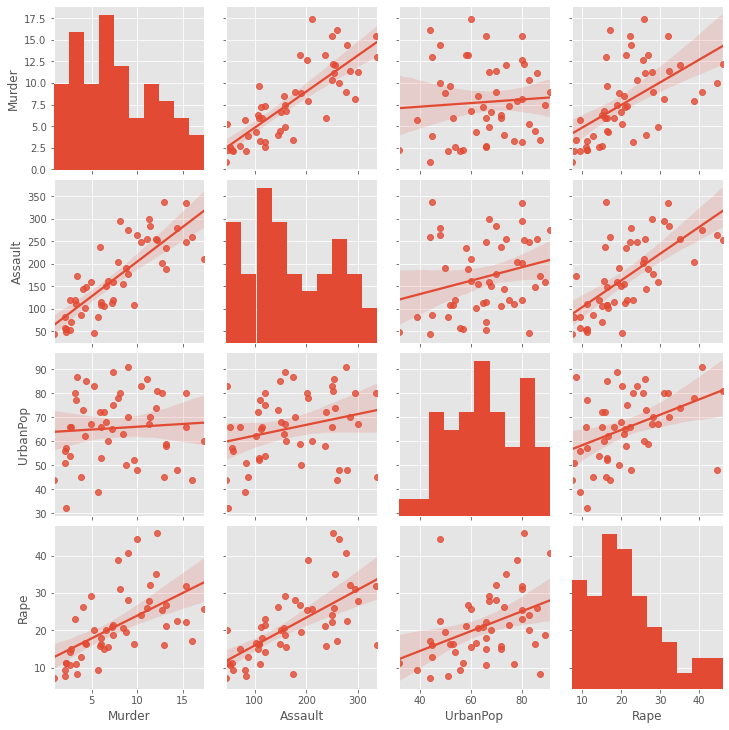

In [ ]:
sns.pairplot(df, kind="reg")


Nota-se que para para assault x murder temos uma tendencia linear de crescimento positivo de duas grandezas que seguem porporcionalmente lineares, tal fator é explicado pela covariancia dos mesmo e da sua correlação positiva.

Note que para Assault e Rape, não explicitamente uma linearidade entre as duas variáveis no entanto pelo valor de sua covariancia há uma força positiva que acompanham as tendencias dos gráficos. 

É importante notar ainda que que para o gráfico Rape x UrbanPop os valores de covariância não são padronizados. Portanto, a covariância pode variar de menos infinito a mais infinito. Assim, o valor para uma relação linear ideal depende dos dados. Como os dados não são padronizadas, é difícil determinar a força da relação entre as variáveis. Fazendo com que o dignóstico entre elas não seja totalmente visível. 

(4) Faz um bagplot para Murder com respeito de Assault e interpretar o resultado.

In [ ]:
!pip install rpy2

In [ ]:
import numpy as np
import rpy2.robjects as robjects

from matplotlib.patches import Polygon

#from CommonFiles.PlotOptions import lighten_color

def calculate_bagplot(x, y, **kwargs):
    """ calculate_bagplot calculates bagplot parameters based on the
    method specificed by P. J. Rousseeuw, I. Ruts, J. W. Tukey (1999).
    The bagplot: a bivariate boxplot, The American Statistician,
    vol. 53, no. 4, 382-387.  This function is a wrapper around the
    R function bagplot provided by the aplpack library. 
    Parameters
    ----------
    x : 1-D sequence of floats
       x is the x-coordinate of the data
    y : 1-D sequence of floats
       y is the y-coordinate of the data
    **kwargs specify additional arguments to be passed directly to the
    boxplot function, overriding defaults.
    'factor'          : 2.5,
    'create_plot'     : False,
    'approx_limit'    : 300,
    'show_outlier'    : True,
    'show_looppoints' : True,
    'show_bagpoints'  : True,
    'dkmethod'        : 2,
    'show_whiskers'   : False,
    'show_loophull'   : True,
    'show_baghull'    : True,
    'verbose'         : False
    Returns
    -------
    dict, containing outputs from the R bagplot object
    """
    # Load APLPACK, library which contains the bagplot function
    robjects.r("library(aplpack)")

    # Import bagplot into the python namespace
    bagplot = robjects.r['bagplot']
    
    # Create an R matrix from the python arrays.
    v = robjects.FloatVector(np.hstack([x, y]))
    m = robjects.r['matrix'](v, ncol=2)

    bag_kwargs = {
        'factor'          : 2.5,
        'create_plot'     : False,
        'approx_limit'    : 300,
        'show_outlier'    : True,
        'show_looppoints' : True,
        'show_bagpoints'  : True,
        'dkmethod'        : 2,
        'show_whiskers'   : False,
        'show_loophull'   : True,
        'show_baghull'    : True,
        'verbose'         : False
    }

    bag_kwargs.update(kwargs)

    # Calculate bagplot data
    bag_data = bagplot(m, **bag_kwargs)

    # Process output results into python data models
    bag_dict = {
        'center'      : np.array(bag_data[0]),
        'hull_center' : np.array(bag_data[1]),
        'hull_bag'    : np.array(bag_data[2]),
        'hull_loop'   : np.array(bag_data[3]),
        'pxy_bag'     : np.array(bag_data[4]),
        'pxy_outer'   : np.array(bag_data[5]),
        'pxy_outlier' : np.array(bag_data[6]),
        'hdepths'     : np.array(bag_data[7]),
        'is_one_dim'  : bool(bag_data[8]),
        'xydata'      : np.array(bag_data[-1]),
    }

    pr_list = bag_data[9]
    pr_dict = {
        'sdev'     : np.array(pr_list[0]),
        'rotation' : np.array(pr_list[1]),
        'center'   : np.array(pr_list[2]),
        'scale'    : bool(pr_list[3]),
        'x'        : np.array(pr_list[4]),
    }
        
    bag_dict['pr_data'] = pr_dict

    return bag_dict


def bagplot(ax, x, y, color, hc=False, filled='bag'):

    bag_dict = calculate_bagplot(x, y)

    hc_poly = Polygon(bag_dict['hull_center'], 
                      
                      ec='none', zorder=0)
    hb_poly = Polygon(bag_dict['hull_bag'], 
                      
                      ec='none', zorder=0)
    hl_poly = Polygon(bag_dict['hull_loop'], 
                      
                      ec='none', zorder=0)

    hc_poly_l = Polygon(bag_dict['hull_center'], ec=color, fc='none',
                      zorder=1, ls='solid')
    hb_poly_l = Polygon(bag_dict['hull_bag'], ec=color, fc='none',
                      zorder=1, ls='solid')
    hl_poly_l = Polygon(bag_dict['hull_loop'], ec=color, fc='none',
                      zorder=1, ls='dashed')

    center = bag_dict['center']

    if filled == 'bag':
        ax.add_patch(hb_poly)
        if hc: ax.add_patch(hc_poly)

    elif filled:
        ax.add_patch(hl_poly)
        ax.add_patch(hb_poly)
        if hc: ax.add_patch(hc_poly)

    ax.add_patch(hl_poly_l)
    ax.add_patch(hb_poly_l)
    if hc: ax.add_patch(hc_poly_l)
    ax.plot(center[0], center[1], 'o', color=color)
    ax.plot(x, y, 'o')

In [ ]:
robjects.r("install.packages('aplpack')")

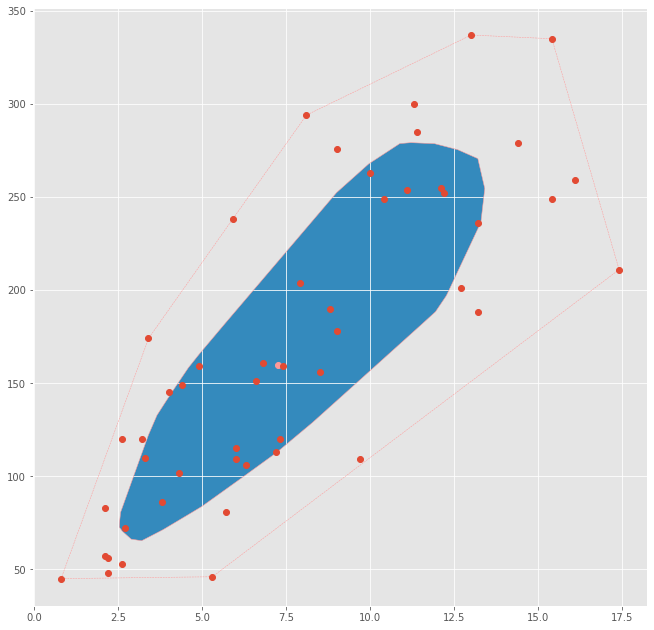

In [ ]:
plt.figure(figsize=(11,11))
ax = plt.axes()
bagplot(ax, df['Murder'], df['Assault'], color='#ff9999', hc=False, filled='bag')

Existe uma correlação positiva, nota-se que há uma simetria em relação a mediana e que por aproximação podemos ter uma reação factual entre as entidades em questão. 

(5) Faz Diagrams de Chernoff para o dado USArrests e interpretar o resultado.


In [ ]:
from pylab import *

def cface(ax, x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18):
    # x1 = height  of upper face
    # x2 = overlap of lower face
    # x3 = half of vertical size of face
    # x4 = width of upper face
    # x5 = width of lower face
    # x6 = length of nose
    # x7 = vertical position of mouth
    # x8 = curvature of mouth
    # x9 = width of mouth
    # x10 = vertical position of eyes
    # x11 = separation of eyes
    # x12 = slant of eyes
    # x13 = eccentricity of eyes
    # x14 = size of eyes
    # x15 = position of pupils
    # x16 = vertical position of eyebrows
    # x17 = slant of eyebrows
    # x18 = size of eyebrows
    
    # transform some values so that input between 0,1 yields variety of output
    x3 = 1.9*(x3-.5)
    x4 = (x4+.25)
    x5 = (x5+.2)
    x6 = .3*(x6+.01)
    x8 = 5*(x8+.001)
    x11 /= 5
    x12 = 2*(x12-.5)
    x13 += .05
    x14 += .1
    x15 = .5*(x15-.5)
    x16 = .25*x16
    x17 = .5*(x17-.5)
    x18 = .5*(x18+.1)

    # top of face, in box with l=-x4, r=x4, t=x1, b=x3
    e = mpl.patches.Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', linewidth=2)
    ax.add_artist(e)

    # bottom of face, in box with l=-x5, r=x5, b=-x1, t=x2+x3
    e = mpl.patches.Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', linewidth=2)
    ax.add_artist(e)

    # cover overlaps
    e = mpl.patches.Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', ec='none')
    ax.add_artist(e)
    e = mpl.patches.Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', ec='none')
    ax.add_artist(e)
    
    # draw nose
    plot([0,0], [-x6/2, x6/2], 'k')
    
    # draw mouth
    p = mpl.patches.Arc( (0,-x7+.5/x8), 1/x8, 1/x8, theta1=270-180/pi*arctan(x8*x9), theta2=270+180/pi*arctan(x8*x9))
    ax.add_artist(p)
    
    # draw eyes
    p = mpl.patches.Ellipse( (-x11-x14/2,x10), x14, x13*x14, angle=-180/pi*x12, facecolor='white')
    ax.add_artist(p)
    
    p = mpl.patches.Ellipse( (x11+x14/2,x10), x14, x13*x14, angle=180/pi*x12, facecolor='white')
    ax.add_artist(p)

    # draw pupils
    p = mpl.patches.Ellipse( (-x11-x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    p = mpl.patches.Ellipse( (x11+x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    
    # draw eyebrows
    plot([-x11-x14/2-x14*x18/2,-x11-x14/2+x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')
    plot([x11+x14/2+x14*x18/2,x11+x14/2-x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')



In [ ]:
df_numpy = df.to_numpy()
#print(df_numpy)

city = []
for e in range(50):
  aux = list(df_numpy[1])
  city.append(aux + [0.8]*14)
df_numpy = df.to_numpy()
#print(df_numpy)

city = []
for e in range(50):
  aux = list(df_numpy[e])
  city.append([ 0.8, 0.8, 0.8, aux[1], 0.8 ,aux[2], 0.8] + [0.3] *2 + [0.7]* 4 + [0.9]*4 +[0.6]*2)

print(city)

[[0.8, 0.8, 0.8, 13.2, 0.8, 236, 0.8, 0.3, 0.3, 0.7, 0.7, 0.7, 0.7, 0.9, 0.9, 0.9, 0.9, 0.6, 0.6], [0.8, 0.8, 0.8, 10.0, 0.8, 263, 0.8, 0.3, 0.3, 0.7, 0.7, 0.7, 0.7, 0.9, 0.9, 0.9, 0.9, 0.6, 0.6], [0.8, 0.8, 0.8, 8.1, 0.8, 294, 0.8, 0.3, 0.3, 0.7, 0.7, 0.7, 0.7, 0.9, 0.9, 0.9, 0.9, 0.6, 0.6], [0.8, 0.8, 0.8, 8.8, 0.8, 190, 0.8, 0.3, 0.3, 0.7, 0.7, 0.7, 0.7, 0.9, 0.9, 0.9, 0.9, 0.6, 0.6], [0.8, 0.8, 0.8, 9.0, 0.8, 276, 0.8, 0.3, 0.3, 0.7, 0.7, 0.7, 0.7, 0.9, 0.9, 0.9, 0.9, 0.6, 0.6], [0.8, 0.8, 0.8, 7.9, 0.8, 204, 0.8, 0.3, 0.3, 0.7, 0.7, 0.7, 0.7, 0.9, 0.9, 0.9, 0.9, 0.6, 0.6], [0.8, 0.8, 0.8, 3.3, 0.8, 110, 0.8, 0.3, 0.3, 0.7, 0.7, 0.7, 0.7, 0.9, 0.9, 0.9, 0.9, 0.6, 0.6], [0.8, 0.8, 0.8, 5.9, 0.8, 238, 0.8, 0.3, 0.3, 0.7, 0.7, 0.7, 0.7, 0.9, 0.9, 0.9, 0.9, 0.6, 0.6], [0.8, 0.8, 0.8, 15.4, 0.8, 335, 0.8, 0.3, 0.3, 0.7, 0.7, 0.7, 0.7, 0.9, 0.9, 0.9, 0.9, 0.6, 0.6], [0.8, 0.8, 0.8, 17.4, 0.8, 211, 0.8, 0.3, 0.3, 0.7, 0.7, 0.7, 0.7, 0.9, 0.9, 0.9, 0.9, 0.6, 0.6], [0.8, 0.8, 0.8, 5.3, 0.8,

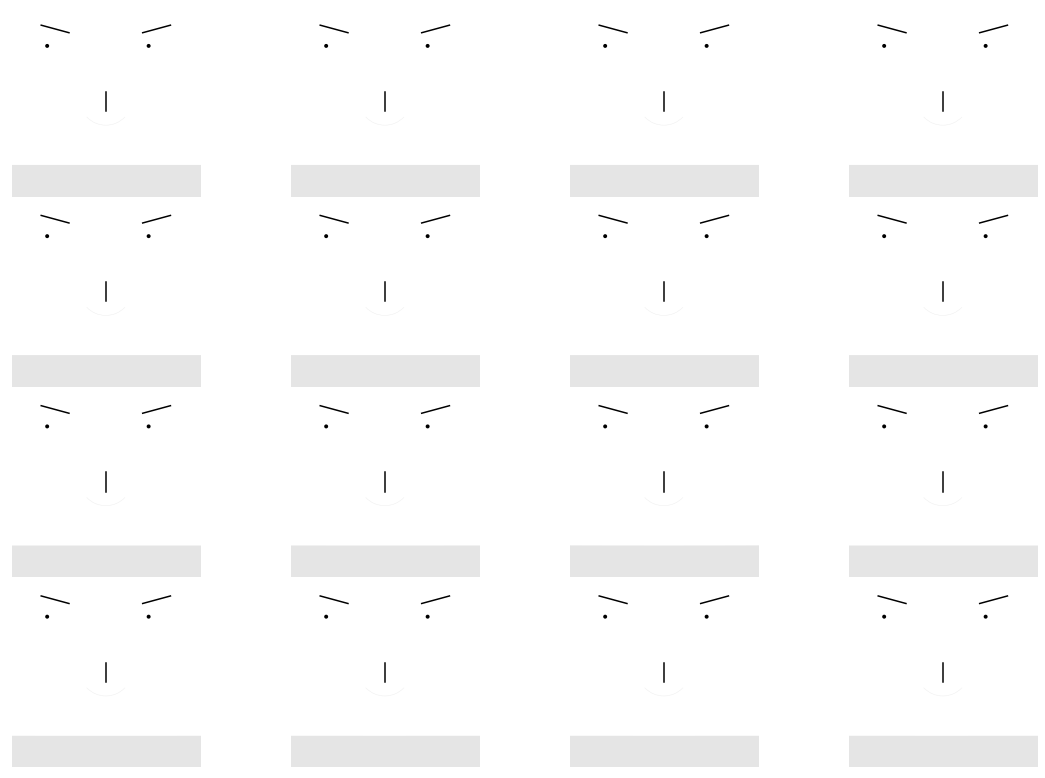

In [ ]:
fig = figure(figsize=(20, 14))
for i in range(16):
    ax = fig.add_subplot(4,4,i+1,aspect='equal')
    cface(ax, city[i][1], city[i][2], city[i][3], city[i][4], city[i][5], city[i][6], city[i][7], city[i][8], city[i][9], city[i][10], city[i][11], city[i][12], city[i][13], city[i][14], city[i][15], city[i][16], city[i][17], city[i][18])
    ax.axis([-1.2,1.2,-1.2,1.2])
    ax.set_xticks([])
    ax.set_yticks([])

fig.subplots_adjust(hspace=0, wspace=0)

O diagramde Cherfnoff ele é um diagrama que relaciona uma característica dos dados a um ou mais elementos das faces, assim nota-se que pela deformidade de um item temos ideia da natureza dos dados, no meu exemplo em particular usei a parte inferior da face, bem como a parte próxima a testa e os olhos para mostrar quão expressivos são os dados resultando nessas propriedades listadas acimas. 